C:\Users\RaymondCarpenter\AppData\Local\Temp\ipykernel_31988\4006012744.py:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1 [ 0.18673341 -0.90440819]
44 [-0.50888116 -0.86089668]


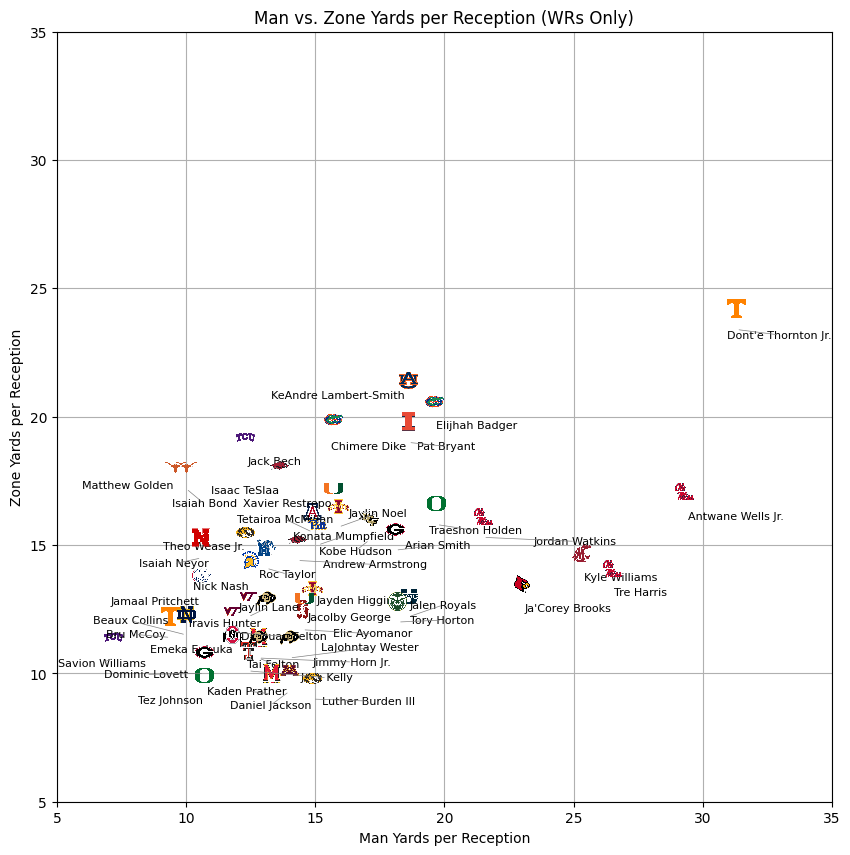

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import urllib.request
from PIL import Image
import io
from adjustText import adjust_text

receiving_scheme = pd.read_csv("C:/Users/RaymondCarpenter/Documents/GitHub/nfl-draft-data/receiving_scheme.csv")
combine_data = pd.read_csv("C:/Users/RaymondCarpenter/Documents/GitHub/nfl-draft-data/combine_data_unique_athlete_id_step4.csv")

wr_players = combine_data[(combine_data['POS_GP'] == "WR") & (combine_data['Year'] == 2025)]['player'].str.lower()
filtered_receiving_scheme = receiving_scheme[
    receiving_scheme['player'].str.lower().isin(wr_players)
]

team_logo_urls = {
    "ARIZONA": "https://a.espncdn.com/i/teamlogos/ncaa/500/12.png",
    "AUBURN": "https://a.espncdn.com/i/teamlogos/ncaa/500/2.png",
    "MISSOURI": "https://a.espncdn.com/i/teamlogos/ncaa/500/142.png",
    "OHIO STATE": "https://a.espncdn.com/i/teamlogos/ncaa/500/194.png",
    "UTAH ST": "https://a.espncdn.com/i/teamlogos/ncaa/500/328.png",
    "TEXAS": "https://a.espncdn.com/i/teamlogos/ncaa/500/251.png",
    "OLE MISS": "https://a.espncdn.com/i/teamlogos/ncaa/500/145.png",
    "IOWA STATE": "https://a.espncdn.com/i/teamlogos/ncaa/500/66.png",
    "GEORGIA": "https://a.espncdn.com/i/teamlogos/ncaa/500/61.png",
    "WASH STATE": "https://a.espncdn.com/i/teamlogos/ncaa/500/265.png",
    "S JOSE ST": "https://a.espncdn.com/i/teamlogos/ncaa/500/23.png",
    "STANFORD": "https://a.espncdn.com/i/teamlogos/ncaa/500/24.png",
    "TCU": "https://a.espncdn.com/i/teamlogos/ncaa/500/2628.png",
    "COLO STATE": "https://a.espncdn.com/i/teamlogos/ncaa/500/36.png",
    "TENNESSEE": "https://a.espncdn.com/i/teamlogos/ncaa/500/2633.png",
    "FLORIDA": "https://a.espncdn.com/i/teamlogos/ncaa/500/57.png",
    "ARKANSAS": "https://a.espncdn.com/i/teamlogos/ncaa/500/8.png",
    "VA TECH": "https://a.espncdn.com/i/teamlogos/ncaa/500/259.png",
    "MIAMI FL": "https://a.espncdn.com/i/teamlogos/ncaa/500/2390.png",
    "MARYLAND": "https://a.espncdn.com/i/teamlogos/ncaa/500/120.png",
    "OREGON": "https://a.espncdn.com/i/teamlogos/ncaa/500/2483.png",
    "MINNESOTA": "https://a.espncdn.com/i/teamlogos/ncaa/500/135.png",
    "NEBRASKA": "https://a.espncdn.com/i/teamlogos/ncaa/500/158.png",
    "COLORADO": "https://a.espncdn.com/i/teamlogos/ncaa/500/38.png",
    "LOUISVILLE": "https://a.espncdn.com/i/teamlogos/ncaa/500/97.png",
    "UCF": "https://a.espncdn.com/i/teamlogos/ncaa/500/2116.png",
    "PITTSBURGH": "https://a.espncdn.com/i/teamlogos/ncaa/500/221.png",
    "UNLV": "https://a.espncdn.com/i/teamlogos/ncaa/500/2439.png",
    "TEXAS TECH": "https://a.espncdn.com/i/teamlogos/ncaa/500/2641.png",
    "NOTRE DAME": "https://a.espncdn.com/i/teamlogos/ncaa/500/87.png",
    "MEMPHIS": "https://a.espncdn.com/i/teamlogos/ncaa/500/235.png",
    "ILLINOIS": "https://a.espncdn.com/i/teamlogos/ncaa/500/356.png",
    "S ALABAMA":"https://a.espncdn.com/i/teamlogos/ncaa/500/6.png"
}

def get_logo(team):
    return team_logo_urls.get(team.upper(), "https://a.espncdn.com/i/teamlogos/ncaa/500/default.png")

filtered_receiving_scheme['logo_url'] = filtered_receiving_scheme['team_name'].apply(get_logo)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Man vs. Zone Yards per Reception (WRs Only)")
ax.set_xlabel("Man Yards per Reception")
ax.set_ylabel("Zone Yards per Reception")
ax.set_xlim(5, 35)
ax.set_ylim(5, 35)
ax.grid(True)

logo_cache = {}

def fetch_image(url):
    if url in logo_cache:
        return logo_cache[url]
    try:
        with urllib.request.urlopen(url) as response:
            data = response.read()
        img = Image.open(io.BytesIO(data))
        logo_cache[url] = img
        return img
    except Exception as e:
        print("Error fetching image:", url, e)
        return None

texts = []

for _, row in filtered_receiving_scheme.iterrows():
    x = row['man_yards_per_reception']
    y = row['zone_yards_per_reception']
    logo_url = row['logo_url']
    player_name = row['player']

    img = fetch_image(logo_url)
    if img is not None:
        im = OffsetImage(img, zoom=0.03) 
        ab = AnnotationBbox(im, (x, y), frameon=False, xycoords='data')
        ax.add_artist(ab)

    txt = ax.text(x, y - 0.8, player_name, ha='center', va='top', fontsize=8, color='black')
    texts.append(txt)

adjust_text(
    texts,
    ax=ax,
    arrowprops=dict(arrowstyle='-', color='gray', lw=0.5),
    expand_points=(1.2, 1.4),
    expand_text=(1.2, 1.4)
)

plt.show()